## **1. Installation**

Aktualisierung auf TensorFlow 2.5

In [ ]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0

--2023-01-04 18:11:14--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430460776 (411M) [application/x-deb]
Saving to: ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb.1’

libcudnn8_8.1.0.77- 100%[===================>] 410.52M   238MB/s    in 1.7s    

2023-01-04 18:11:16 (238 MB/s) - ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb.1’ saved [430460776/430460776]

(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.1.0.77-1+cuda11.2) ...
Setting up libcudnn8 (8.1.0.77-1+cuda11.2) ...
lrwxrwxrwx 1 root root     17 Jan 25  2021 /usr/lib/x86_64-linux-gnu

Install Mask R-CNN

In [ ]:
!wget https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
!unzip maskrcnn_colab_demo_commit_17.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
%matplotlib inline

--2023-01-04 18:12:04--  https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.21.67.193, 2606:4700:3036::ac43:b421, ...
Connecting to pysource.com (pysource.com)|172.67.180.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59340 (58K) [application/zip]
Saving to: ‘maskrcnn_colab_demo_commit_17.zip’

maskrcnn_colab_demo 100%[===================>]  57.95K  --.-KB/s    in 0.01s   

2023-01-04 18:12:05 (5.08 MB/s) - ‘maskrcnn_colab_demo_commit_17.zip’ saved [59340/59340]

Archive:  maskrcnn_colab_demo_commit_17.zip
   creating: maskrcnn_colab/
   creating: maskrcnn_colab/mrcnn_demo/
  inflating: maskrcnn_colab/mrcnn_demo/config.py  
  inflating: maskrcnn_colab/mrcnn_demo/model.py  
  inflating: maskrcnn_colab/mrcnn_demo/m_rcnn.py  
  inflating: maskrcnn_colab/mrcnn_demo/parallel_model.py  
  inflating: maskrcnn_colab/mrcnn_demo/utils.py  
  inflating: maskrcnn_colab/mrcnn_demo/visualize.py 

/content/maskrcnn_colab/mrcnn_demo/model.py:2378: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if os.name is 'nt':


... done downloading pretrained model!


In [ ]:
!nvidia-smi

Wed Jan  4 18:12:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **2. Bild Datasatz**

Laden von annotierten Datensatz


In [ ]:
# Extract Images
images_path = "dataset.zip"
annotations_path = "annotations.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 22 images


In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/annotations.json
Annotation json path:  /content/annotations.json
Train: 16
Validation: 2
Classes: 1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


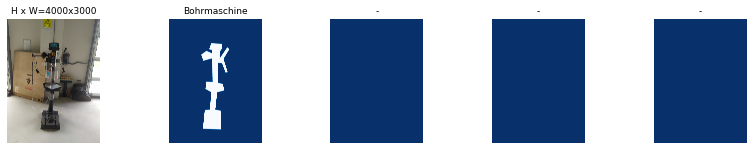

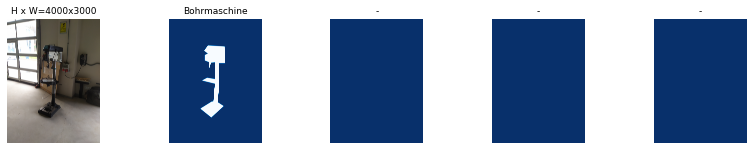

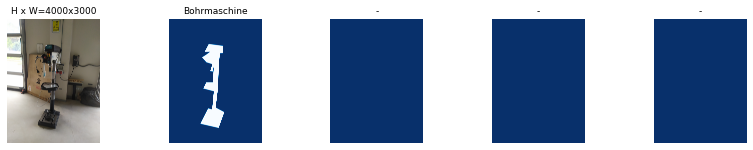

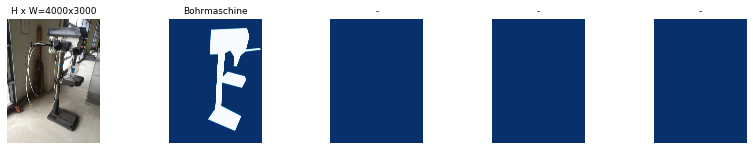

In [ ]:
# Load image samples
display_image_samples(dataset_train)

##**3. Training**

Trainierung Mask RCNN auf benutzerdefinierten Datensatz.

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
# config.display()
model = load_training_model(config)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


/content/maskrcnn_colab/mask_rcnn_coco.h5


In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/maskrcnn_colab/logs/object20230104T1827/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_mask_deconv  

## **4. Erkennung (Testmodell auf einem zufalligen Bild)**

In [ ]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)

Loading weights from  /content/maskrcnn_colab/logs/object20230104T1827/mask_rcnn_object_0005.h5
Re-starting from epoch 5


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


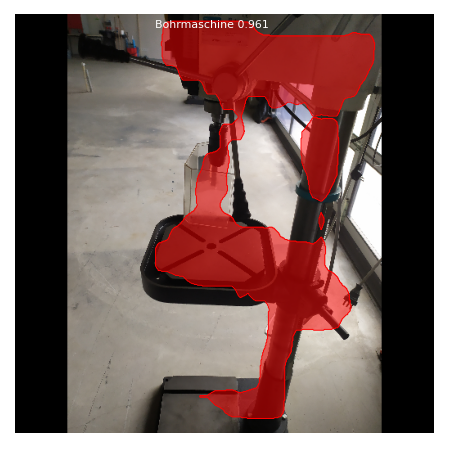

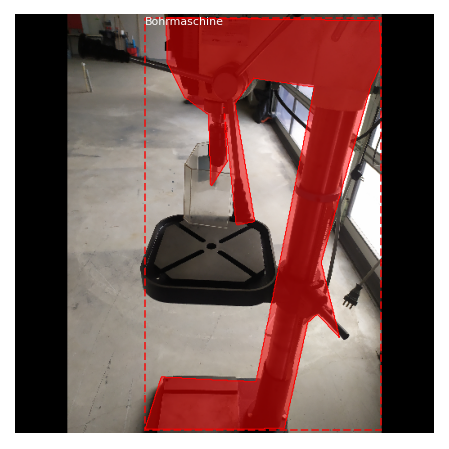

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)